# 4.4.2.2. Imbalance in multi-class classification metrics

Extension of Luque et al.'s analysis to multi-class problems.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from metrics.unbalance import cm_multiclass_ed, cm_multiclass_rd, cm_multiclass_bo, get_distributed_proportions, rescale_metric, perclass
from metrics.classification import kappaU, kappaL, kappaQ, MCC, Accuracy, sF1, hF1, GM
from functools import partial

In [2]:
mc_metrics = {
    'kUn': partial(rescale_metric, kappaU), 
    'kLn': partial(rescale_metric, kappaL), 
    'kQn': partial(rescale_metric, kappaQ),
    'MCCn': partial(rescale_metric, MCC), 
    'Acc': Accuracy, 
    'hF1': hF1, 
    'sF1': sF1, 
    'GM': GM 
}

**Class distributions in a 4-class problem**

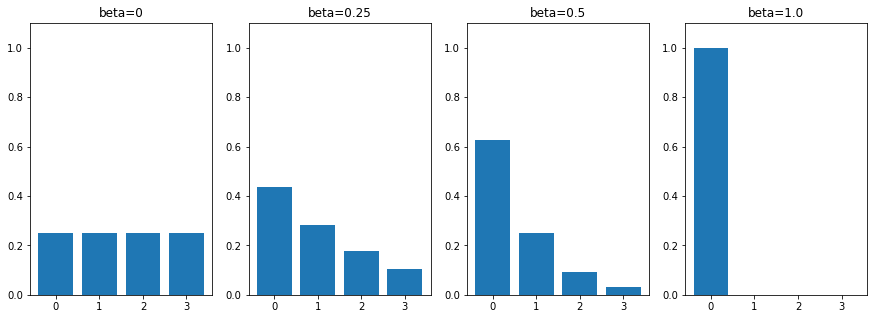

In [3]:
plt.figure(figsize=(15,5))
for i,beta in enumerate([0, 0.25, 0.5, 1.]):
    plt.subplot(1,4,i+1)
    plt.bar(range(4), get_distributed_proportions(4, beta))
    plt.ylim([0, 1.1])
    plt.title(f'beta={beta}')
plt.show()

**Error distributions in a 3- or 4-class problem**

Scenarios:

* ED = "evenly distributed error"
* RD = "randomly distributed error"
* MB = "majority bias error"

**Confusion matrices for the 4-class problem in the 3 scenarios**

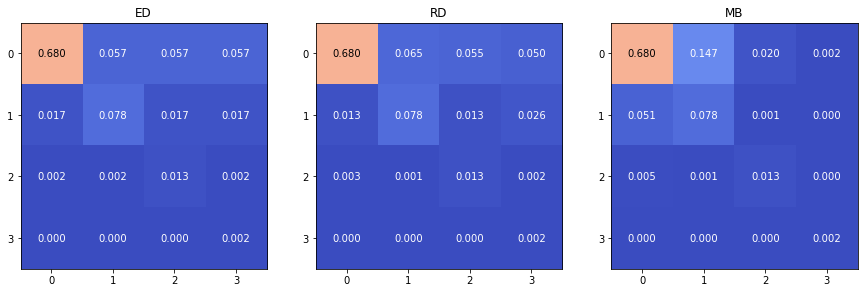

In [4]:
m = 4
scenarios = {
    'ED': cm_multiclass_ed,
    'RD': cm_multiclass_rd,
    'MB': cm_multiclass_bo
}

plt.figure(figsize=(15,5))
for ids, (key, get_cm) in enumerate(scenarios.items()):
    cm = get_cm(m, np.array([0.8, 0.6, 0.7, 0.9]), 0.8)
    plt.subplot(1, 3, ids+1)
    plt.imshow(cm, interpolation='none', cmap=plt.cm.coolwarm, vmin=0, vmax=1)
    for i in range(m):
        for j in range(m):
            color = 'k' if cm[i, j] > 0.5 else 'w'
            text = plt.text(j, i, f'{cm[i, j]:.3f}', ha="center", va="center", color=color, fontsize='medium')
    plt.xticks(range(m))
    plt.yticks(range(m))
    plt.title(key)
plt.show()

**3-classes range of bias**

In [5]:
m = 3
betas = [0, 0.5, 0.99]
sen_0 = np.array([0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])
sen_1 = np.array([0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])
sen_2 = np.array([0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])

In [ ]:
all_results = {}
for scenario in scenarios:
    all_results[scenario] = {}
    for metric_name in mc_metrics:
        all_results[scenario][metric_name] = np.zeros((len(betas), len(sen_0), len(sen_1), len(sen_2)))

for idb,beta in enumerate(betas):
    for ids0, s0 in enumerate(sen_0):
        for ids1, s1 in enumerate(sen_1):
            for ids2, s2 in enumerate(sen_2):
                for scenario, get_cm in scenarios.items():
                    cm = get_cm(m, np.array([s0, s1, s2]), beta)
                    for key, metric in mc_metrics.items():
                        all_results[scenario][key][idb,ids0,ids1,ids2] = metric(cm)

In [ ]:
# Save for reuse
import pickle
with open('./data/mc_metrics_results_3classes.pkl', 'wb') as fp:
   pickle.dump(all_results, fp)

In [6]:
# Load for reuse
import pickle
with open('./data/mc_metrics_results_3classes.pkl', 'rb') as fp:
    all_results = pickle.load(fp)

In [7]:
for scenario in scenarios:
    print(f'==== {scenario} ====')
    for key in mc_metrics:
        print(key)
        min_ = 0
        max_ = 0
        bal = all_results[scenario][key][0]
        for i_b, beta in enumerate(betas[1:]):
            bias = all_results[scenario][key][i_b+1]-bal
            min_ = min(min_, bias.min())
            max_ = max(max_, bias.max())
        print(f'[{min_:.2f}, {max_:.2f}]')
    print('----------')

==== ED ====
kUn
[-0.42, 0.24]
kLn
[-0.43, 0.24]
kQn
[-0.44, 0.32]
MCCn
[-0.36, 0.20]
Acc
[-0.65, 0.65]
hF1
[-0.42, 0.10]
sF1
[-0.42, 0.16]
GM
[-0.00, 0.00]
----------
==== RD ====
kUn
[-0.42, 0.24]
kLn
[-0.43, 0.22]
kQn
[-0.44, 0.27]
MCCn
[-0.37, 0.21]
Acc
[-0.65, 0.65]
hF1
[-0.43, 0.11]
sF1
[-0.42, 0.14]
GM
[-0.00, 0.00]
----------
==== MB ====
kUn
[-0.42, 0.24]
kLn
[-0.41, 0.24]
kQn
[-0.41, 0.32]
MCCn
[-0.37, 0.13]
Acc
[-0.65, 0.65]
hF1
[-0.42, 0.10]
sF1
[-0.44, 0.16]
GM
[-0.00, 0.00]
----------


**4-classes ranges of bias**

In [ ]:
m = 4
betas = [0., 0.5, 0.99]
sen_0 = np.array([0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])
sen_1 = np.array([0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])
sen_2 = np.array([0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])
sen_3 = np.array([0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])

all_results = {}
for scenario in scenarios:
    all_results[scenario] = {}
    for metric_name in mc_metrics:
        all_results[scenario][metric_name] = np.zeros((len(betas), len(sen_0), len(sen_1), len(sen_2), len(sen_3)))

for idb,beta in enumerate(betas):
    for ids0, s0 in enumerate(sen_0):
        for ids1, s1 in enumerate(sen_1):
            for ids2, s2 in enumerate(sen_2):
                for ids3, s3 in enumerate(sen_3):
                    for scenario, get_cm in scenarios.items():
                        cm = get_cm(m, np.array([s0, s1, s2, s3]), beta)
                        for key, metric in mc_metrics.items():
                            all_results[scenario][key][idb,ids0,ids1,ids2,ids3] = metric(cm)

In [ ]:
# Save for reuse
import pickle
with open('./data/mc_metrics_results_4classes.pkl', 'wb') as fp:
   pickle.dump(all_results, fp)

In [8]:
# Load for reuse
import pickle
with open('./data/mc_metrics_results_3classes.pkl', 'rb') as fp:
    all_results = pickle.load(fp)

In [9]:
for scenario in scenarios:
    print(f'==== {scenario} ====')
    for key in mc_metrics:
        print(key)
        min_ = 0
        max_ = 0
        bal = all_results[scenario][key][0]
        for i_b, beta in enumerate(betas[1:]):
            bias = all_results[scenario][key][i_b+1]-bal
            min_ = min(min_, bias.min())
            max_ = max(max_, bias.max())
        print(f'[{min_:.2f}, {max_:.2f}]')
    print('----------')

==== ED ====
kUn
[-0.42, 0.24]
kLn
[-0.43, 0.24]
kQn
[-0.44, 0.32]
MCCn
[-0.36, 0.20]
Acc
[-0.65, 0.65]
hF1
[-0.42, 0.10]
sF1
[-0.42, 0.16]
GM
[-0.00, 0.00]
----------
==== RD ====
kUn
[-0.42, 0.24]
kLn
[-0.43, 0.22]
kQn
[-0.44, 0.27]
MCCn
[-0.37, 0.21]
Acc
[-0.65, 0.65]
hF1
[-0.43, 0.11]
sF1
[-0.42, 0.14]
GM
[-0.00, 0.00]
----------
==== MB ====
kUn
[-0.42, 0.24]
kLn
[-0.41, 0.24]
kQn
[-0.41, 0.32]
MCCn
[-0.37, 0.13]
Acc
[-0.65, 0.65]
hF1
[-0.42, 0.10]
sF1
[-0.44, 0.16]
GM
[-0.00, 0.00]
----------
